In [1]:
!pip install mplfinance
!pip install yfinance 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib. dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly. subplots import make_subplots

     ---------------------------------------- 0.0/315.2 kB ? eta -:--:--
     ---------------- --------------------- 133.1/315.2 kB 4.0 MB/s eta 0:00:01
     -------------------------------------- 315.2/315.2 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 24.8 MB/s eta 0:00:01
     ----------------------------- ---------- 2.2/3.0 MB 28.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 23.5 MB/s eta 0:00:00
  Installing build depe

**Utilizando a biblioteca Yahoo Finance**

Baixamos os dados históricos da ação PETR4 do periodo 2023-01-01 a 2023-12-31

In [2]:
dados = yf.download('PETR4.SA', start = '2023-01-01', end = '2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


**Renomeando as colunas para português.**

In [3]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


**Rename do index**

In [4]:
dados.rename_axis('Data')

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


**Gerando um gráfico que apresenta a variação do preço de fechamento da ação PETR4 no período de 01-01-2023 a 31-12-2023.**

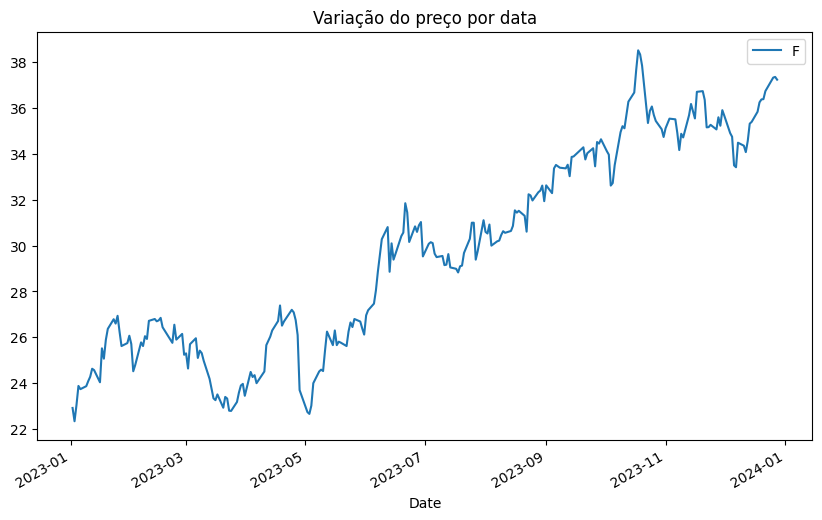

In [5]:
dados['Fechamento'].plot(figsize = (10,6))
plt.title('Variação do preço por data')
plt.legend('Fechamento')

In [6]:
df = dados.head(60).copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Date,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443508,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030731,58130000,19369.0


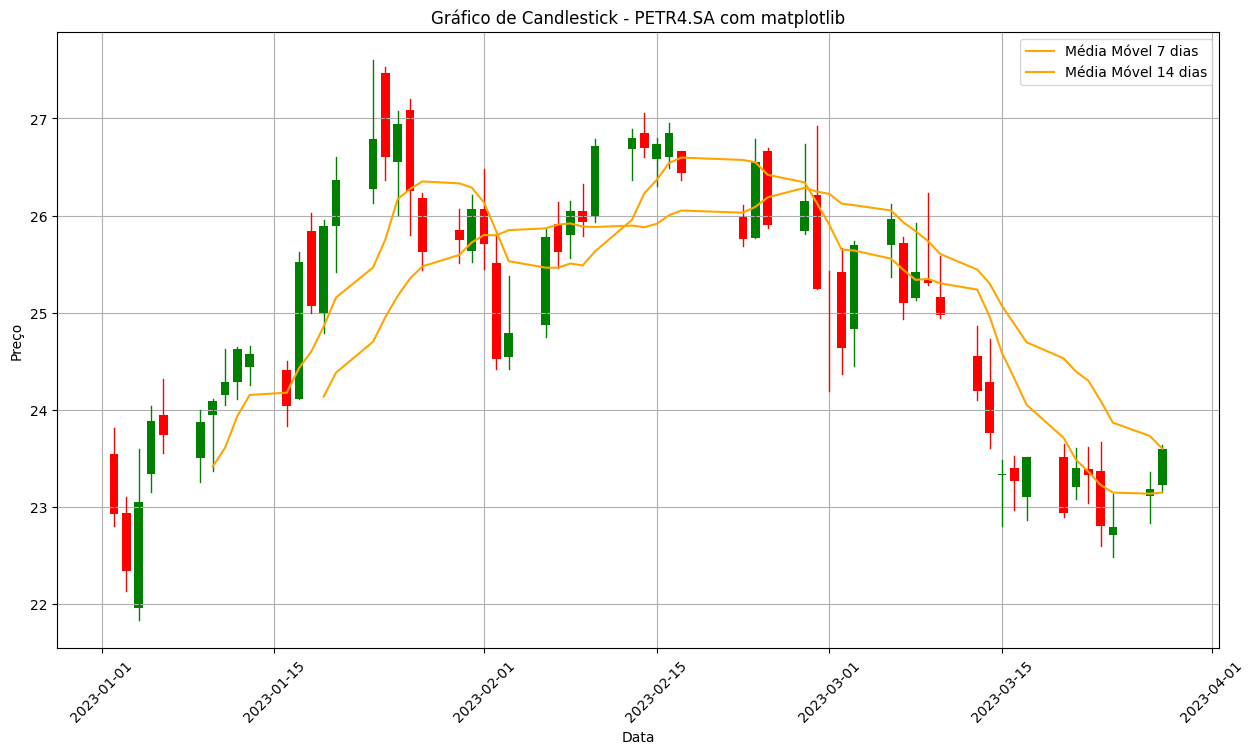

In [7]:
fig, ax = plt.subplots(figsize = (15,8))

width = 0.7

for i in range(len(df)):
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
    color = 'green'
  else:
    color = 'red'

  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color = color,
          linewidth = 1)

  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                             width,
                             abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                             facecolor = color))

df['MA7'] = df['Fechamento'].rolling(window = 7).mean()
df['MA14'] = df['Fechamento'].rolling(window = 14).mean()

ax.plot(df['Data'], df['MA7'], color = 'orange', label = 'Média Móvel 7 dias')
ax.plot(df['Data'], df['MA14'], color = 'orange', label = 'Média Móvel 14 dias')

ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation = 45)

plt.title('Gráfico de Candlestick - PETR4.SA com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()